<a href="https://colab.research.google.com/github/faradishaldina/Faradisha_PCVK/blob/main/Week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **FARADISHA ALDINA PUTRI - 2141720159 - TI 3I**

***MODUL 6 – Histogram, Histogram Equalization, Dithering***

1. **Import the existing folder on your Drive as follows.**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


2. **Import the following libraries that will be used during the following week 6 practicum trial.**

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. **Make an image histogram like the following histogram output based on the flowchart below : (Use image lena.jpg)**

<ipython-input-10-2cac64dff571>:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  blue_hist = np.zeros(256, dtype=np.int)
<ipython-input-10-2cac64dff571>:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20

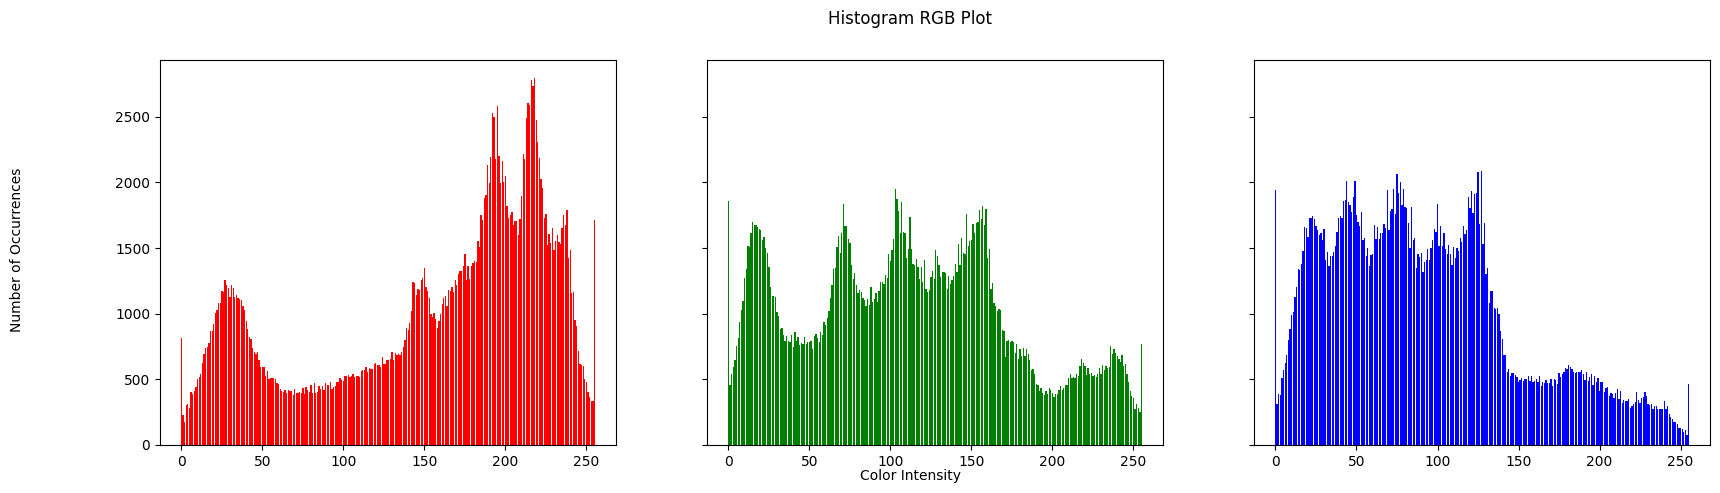

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv.imread('/content/drive/MyDrive/PCVK_Fara/lena.jpg')

# Get image dimensions
height, width, depth = img.shape

# Initialize arrays to store histogram data for each color channel
blue_hist = np.zeros(256, dtype=np.int)
green_hist = np.zeros(256, dtype=np.int)
red_hist = np.zeros(256, dtype=np.int)

# Calculate histograms for each color channel
for y in range(height):
    for x in range(width):
        blue_intensity = img[y, x, 0]
        green_intensity = img[y, x, 1]
        red_intensity = img[y, x, 2]

        blue_hist[blue_intensity] += 1
        green_hist[green_intensity] += 1
        red_hist[red_intensity] += 1

# Create intensity range from 0 to 255
intensity_range = np.arange(256)

# Create subplots for displaying histograms
fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB Plot')
fig.text(0.05, 0.5, 'Number of Occurrences', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Color Intensity', ha='center')

# Plot histograms for each color channel
axs[0].bar(intensity_range, red_hist, color='red')
axs[1].bar(intensity_range, green_hist, color='green')
axs[2].bar(intensity_range, blue_hist, color='blue')

# Show the plot
plt.show()


4. **After working on question no. 3, make the same image histogram but use the library that is owned by NumPy, namely " histogram ". Compare the results. Does the output appear the same?**

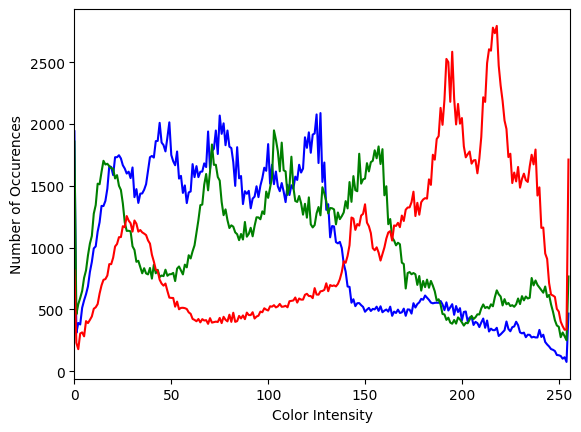

In [ ]:
colors = ("b", "g", "r")
channel_ids = (0,1,2)

plt.xlim([0,256])
for channel_id, c in zip(channel_ids, colors):
  histogram, bin_edges = np.histogram(
      img[:,:, channel_id], bins=256, range=(0,256)
  )
  plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Color Intensity")
plt.ylabel("Number of Occurences")

plt.show()

5. **Make an image histogram such as the output equalization histogram and also the image display before and after the following equalization histogram process based on the flowchart below : (Use image lena_lc .jpg)**

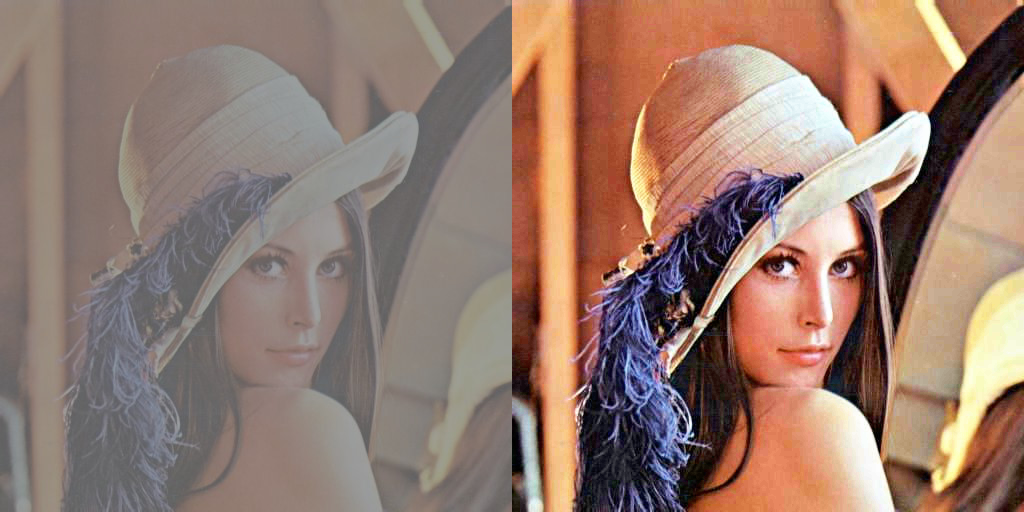

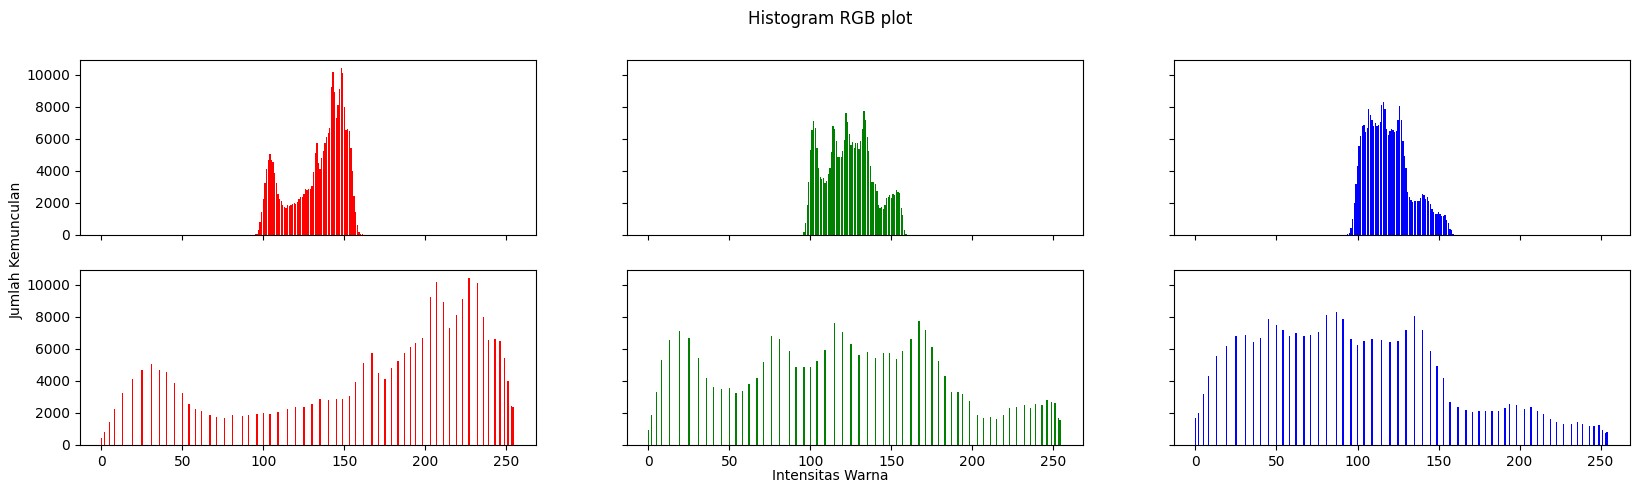

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK_Fara/lena_lc.jpg')
def histog(img):
  height, width, depth = np.shape(img)
  ax = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      ax[0][img[y][x][0]] += 1
      ax[1][img[y][x][1]] += 1
      ax[2][img[y][x][2]] += 1
  return ax

histo_asli = histog(img)

#convert to Numpy array
img_array = np.asarray(img)

#STEP 1: Normalized cumulative histogram
#flatten image array and calculate histogram via binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalize
num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)

#STEP 2: Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

#STEP 3: Transformation
# flatten image array into 10 list
img_list = list(img_array.flatten())

# transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img, img2)) #concatenate image
cv2_imshow(final_frame)

names = np.arange (256)
isgrayimg = np.array_equal(blue, green, red)
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, equal_histo[2], color='red')
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue')
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=Trbe, sharey=True)
  fig. suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

6. **After working on question no. 5, make the same image histogram but use the library owned by CV2, namely " equalizeHist ". Compare the results. Does the output appear the same?**

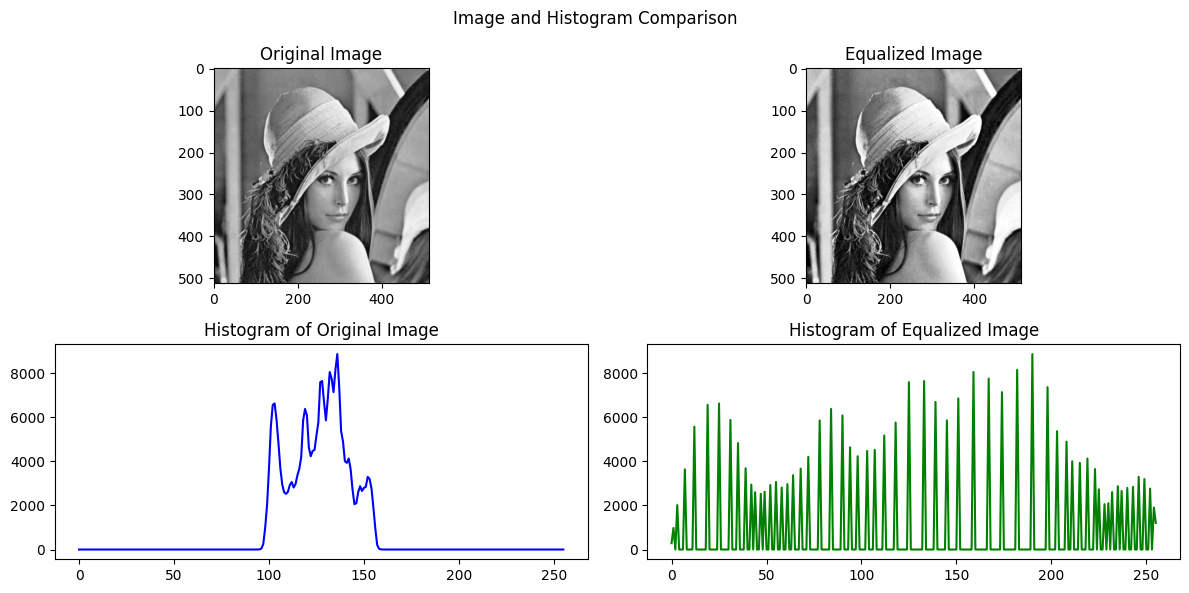

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

# Load the grayscale image
img = cv.imread('/content/drive/MyDrive/PCVK_Fara/lena_lc.jpg', 0)

# Apply histogram equalization using cv2
equalized_img = cv.equalizeHist(img)

# Calculate the histograms of the original and equalized images
hist_original = cv.calcHist([img], [0], None, [256], [0, 256])
hist_equalized = cv.calcHist([equalized_img], [0], None, [256], [0, 256])

# Create subplots for displaying the images and histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# Original Image
axes[0, 0].imshow(img, cmap='gray')
axes[0, 0].set_title('Original Image')

# Equalized Image
axes[0, 1].imshow(equalized_img, cmap='gray')
axes[0, 1].set_title('Equalized Image')

# Histogram of Original Image
axes[1, 0].plot(hist_original, color='blue')
axes[1, 0].set_title('Histogram of Original Image')

# Histogram of Equalized Image
axes[1, 1].plot(hist_equalized, color='green')
axes[1, 1].set_title('Histogram of Equalized Image')

# Set the main title
plt.suptitle('Image and Histogram Comparison')

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()


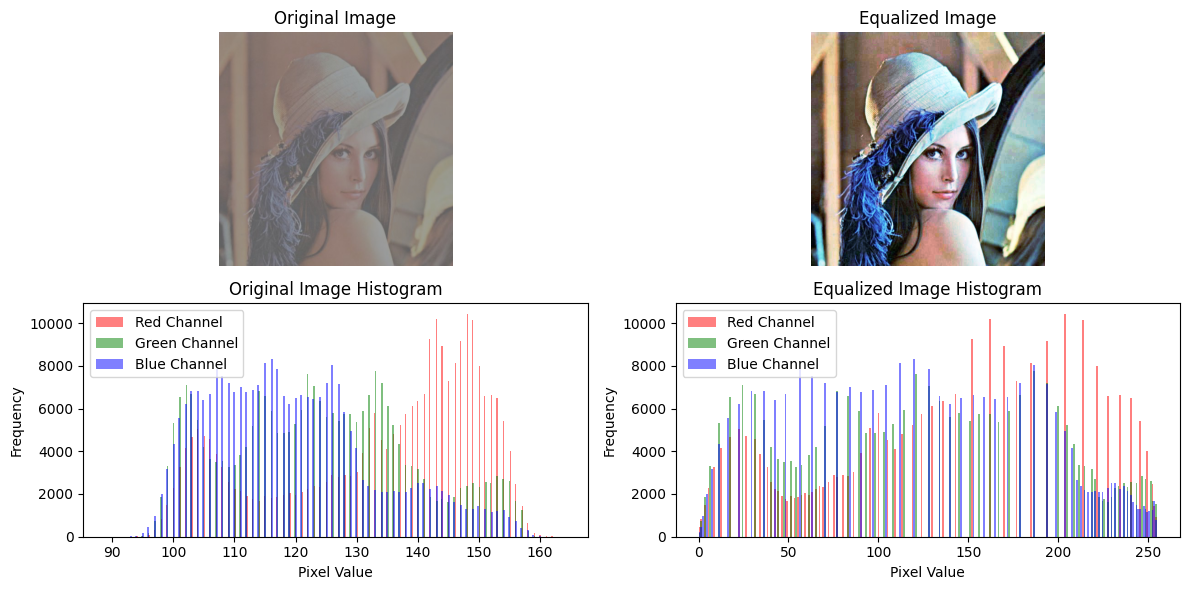

In [ ]:

# Load the image
img = cv.imread('/content/drive/MyDrive/PCVK_Fara/lena_lc.jpg')

# Convert BGR image to RGB
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Separate the RGB channels
r_channel, g_channel, b_channel = cv.split(img_rgb)

# Perform histogram equalization on each channel
r_equalized = cv.equalizeHist(r_channel)
g_equalized = cv.equalizeHist(g_channel)
b_equalized = cv.equalizeHist(b_channel)

# Merge the equalized channels back into an RGB image
img_equalized = cv.merge([r_equalized, g_equalized, b_equalized])

# Plot original and equalized images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

# Equalized image
plt.subplot(2, 2, 2)
plt.imshow(img_equalized)
plt.title('Equalized Image')
plt.axis('off')

# Plot histograms
plt.subplot(2, 2, 3)
plt.hist(r_channel.ravel(), bins=256, color='red', alpha=0.5, label='Red Channel')
plt.hist(g_channel.ravel(), bins=256, color='green', alpha=0.5, label='Green Channel')
plt.hist(b_channel.ravel(), bins=256, color='blue', alpha=0.5, label='Blue Channel')
plt.title('Original Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2, 2, 4)
plt.hist(r_equalized.ravel(), bins=256, color='red', alpha=0.5, label='Red Channel')
plt.hist(g_equalized.ravel(), bins=256, color='green', alpha=0.5, label='Green Channel')
plt.hist(b_equalized.ravel(), bins=256, color='blue', alpha=0.5, label='Blue Channel')
plt.title('Equalized Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


In question 5, the code carries out histogram equalization through manual steps, whereas in question 6, it employs the OpenCV function cv2.equalizeHist to perform the same operation. Both methods share the objective of improving an image's contrast and brightness by redistributing pixel intensities, but the second approach using cv2.equalizeHist is more efficient and yields a comparable outcome.

**7. Do the mapping process of 16 million RGB colors into just 8 colors, namely black, green, yellow, blue, cyan, magenta, white as shown in the following output based on the flowchart below! (Use the image testlena .jpg)**

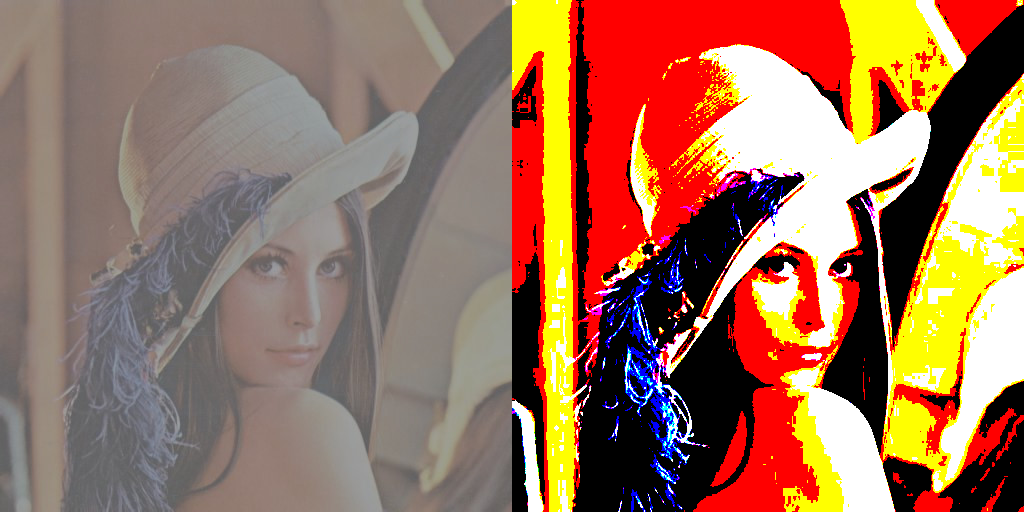

True

In [ ]:

def closestColour (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16.shape, img_16.dtype)

for y in range(0, img_16.shape[0]):
  for x in range(0, img_16.shape[1]):
    baru = closestColour(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])
    img_8[y, x] = warnaPallette[baru]

img_16 = cv.cvtColor(img_16, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_16, img_8))
cv2_imshow(final_frame)
cv.imwrite('/content/drive/MyDrive/PCVK_Fara/testlena.jpg', img_8)

8. **Do the Floyd and Steinberg dithering process like the following output (initial image display, and after dithering display) based on the flowchart below! (Use wiki.jpg image)**

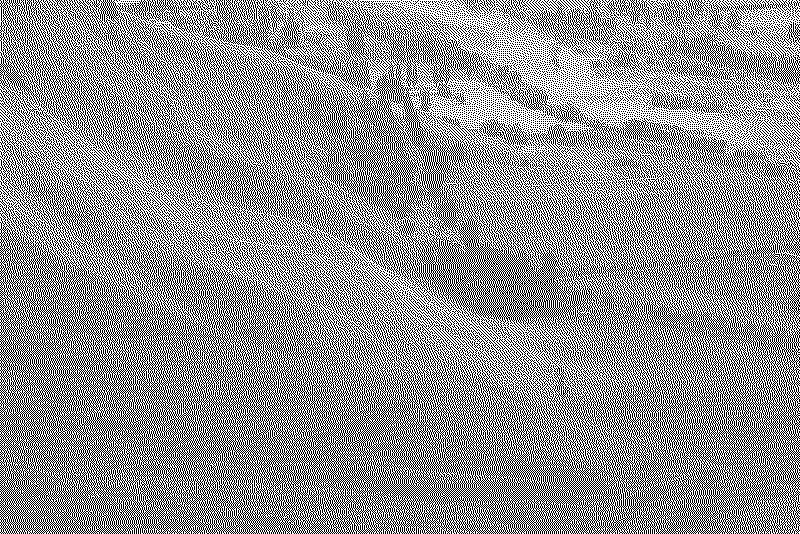

In [ ]:
from PIL import Image
import cv2
import numpy as np

imageConvert = Image.open('/content/drive/MyDrive/PCVK_Fara/wiki.jpg').convert(mode='1', dither=Image.FLOYDSTEINBERG)

Image = cv2.imread('/content/drive/MyDrive/PCVK_Fara/wiki.jpg')

GrayImage = cv2.cvtColor(Image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('/content/drive/MyDrive/PCVK_Fara/wiki.jpg', GrayImage)

Height = GrayImage.shape[0]
Width = GrayImage.shape[1]

for y in range(0, Height):
    for x in range(0, Width):
        old_value = GrayImage[y, x]
        new_value = 0
        if (old_value > 128):
            new_value = 255

        GrayImage[y, x] = new_value

        Error = old_value - new_value

        if (x < Width - 1):
            NewNumber = GrayImage[y, x + 1] + Error * 7 // 16
            if (NewNumber > 255):
                NewNumber = 255
            elif (NewNumber < 0):
                NewNumber = 0
            GrayImage[y, x + 1] = NewNumber

        if (x > 0 and y < Height - 1):
            NewNumber = GrayImage[y + 1, x - 1] + Error * 3 // 16
            if (NewNumber > 255):
                NewNumber = 255
            elif (NewNumber < 0):
                NewNumber = 0
            GrayImage[y + 1, x - 1] = NewNumber

        if (y < Height - 1):
            NewNumber = GrayImage[y + 1, x] + Error * 5 // 16
            if (NewNumber > 255):
                NewNumber = 255
            elif (NewNumber < 0):
                NewNumber = 0
            GrayImage[y + 1, x] = NewNumber

        if (x < Width - 1 and y < Height - 1):
            NewNumber = GrayImage[y + 1, x + 1] + Error * 1 // 16
            if (NewNumber > 255):
                NewNumber = 255
            elif (NewNumber < 0):
                NewNumber = 0
            GrayImage[y + 1, x + 1] = NewNumber

cv2.imwrite('/content/drive/MyDrive/PCVK_Fara/wiki.jpg', GrayImage)
cv2_imshow(GrayImage)
